# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities=cities[0:6] #Sample

City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

i=0

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    

    cld=weather_json["clouds"]["all"]
    ct=weather_json["sys"]["country"]
    wt=weather_json["dt"]
    hm=weather_json["main"]["humidity"]
    lt=weather_json["coord"]["lat"]
    lg=weather_json["coord"]["lon"]
    mx=weather_json["coord"]["lon"]
    mn=weather_json["main"]["temp_min"]
   
    i=i+1
    City.append(city)
    Cloudiness.append(cld)
    Country.append(ct)
    Date.append(wt)
    Humidity.append(hm)
    Lat.append(lt)
    Lng.append(lg)
    Max_Temp.append(mx)
    Wind_Speed.append(mn)
    print(f"Processing Record {i} of Set 1 | {city}")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | riyadh
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | puerto madryn


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
df=pd.DataFrame({"City":City, "Cloudiness":Cloudiness,"Country":Country, "Date":Date,
                 "Humidity":Humidity,"Lat":Lat,"Lng":Lng,"Max Temp":Max_Temp,"Wind_Speed":Wind_Speed})
df.count()

City          6
Cloudiness    6
Country       6
Date          6
Humidity      6
Lat           6
Lng           6
Max Temp      6
Wind_Speed    6
dtype: int64

In [33]:
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,butaritari,0,KI,1569465374,75,3.07,172.79,172.79,301.992
1,esperance,40,AU,1569465374,68,-33.86,121.89,121.89,292.150
2,riyadh,0,SA,1569465374,33,24.63,46.72,46.72,297.150
3,vaini,75,IN,1569465375,94,15.34,74.49,74.49,295.150
4,cherskiy,0,RU,1569465186,48,68.75,161.30,161.30,276.132
5,puerto madryn,0,AR,1569465184,41,-42.77,-65.04,-65.04,290.292


In [34]:
df.to_csv("output.csv", index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

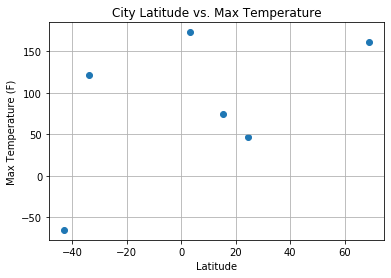

In [35]:
plt.scatter(Lat,Max_Temp)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

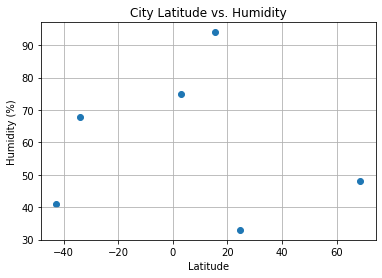

In [36]:
plt.scatter(Lat,Humidity)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

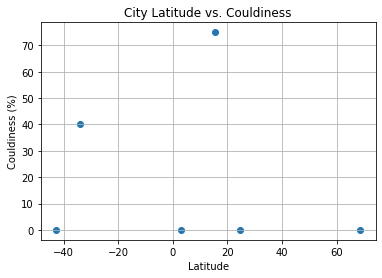

In [37]:
plt.scatter(Lat,Cloudiness)
plt.title("City Latitude vs. Couldiness")
plt.xlabel("Latitude")
plt.ylabel("Couldiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

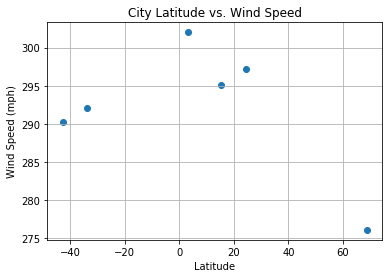

In [38]:
plt.scatter(Lat,Wind_Speed)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [54]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere=df[df["Lat"]>0]
Southern_Hemisphere=df[df["Lat"]<0]

            City  Cloudiness Country        Date  Humidity    Lat     Lng  \
1      esperance          40      AU  1569465374        68 -33.86  121.89   
5  puerto madryn           0      AR  1569465184        41 -42.77  -65.04   

   Max Temp  Wind_Speed  
1    121.89     292.150  
5    -65.04     290.292  


In [55]:
Northern_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,butaritari,0,KI,1569465374,75,3.07,172.79,172.79,301.992
2,riyadh,0,SA,1569465374,33,24.63,46.72,46.72,297.150
3,vaini,75,IN,1569465375,94,15.34,74.49,74.49,295.150
4,cherskiy,0,RU,1569465186,48,68.75,161.30,161.30,276.132


In [56]:
Southern_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
1,esperance,40,AU,1569465374,68,-33.86,121.89,121.89,292.150
5,puerto madryn,0,AR,1569465184,41,-42.77,-65.04,-65.04,290.292


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

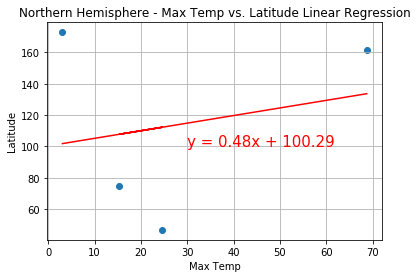

In [71]:
y_values = Northern_Hemisphere["Max Temp"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,100),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

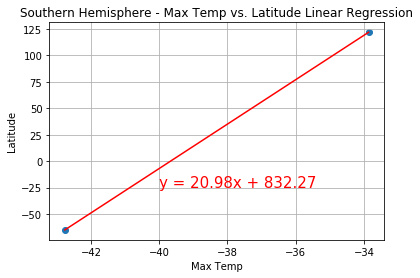

In [74]:
y_values = Southern_Hemisphere["Max Temp"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

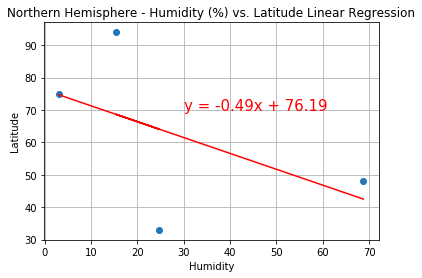

In [78]:
y_values = Northern_Hemisphere["Humidity"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,70),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

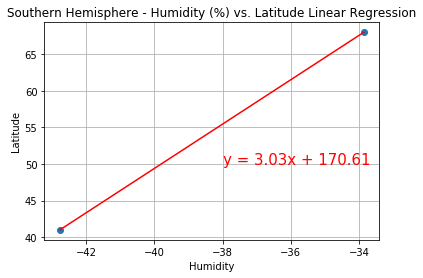

In [81]:
y_values = Southern_Hemisphere["Humidity"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-38,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

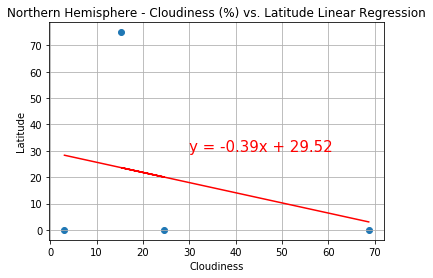

In [83]:
y_values = Northern_Hemisphere["Cloudiness"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

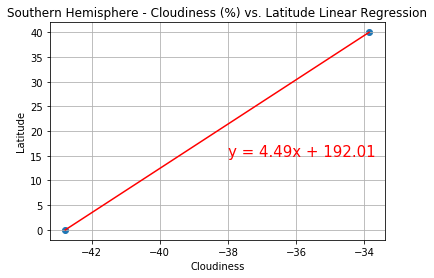

In [85]:
y_values = Southern_Hemisphere["Cloudiness"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-38,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

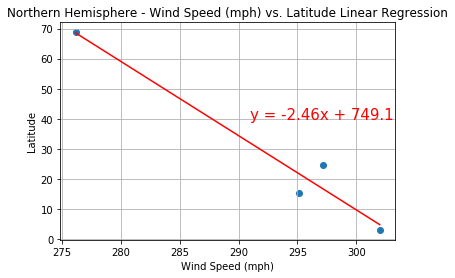

In [95]:
x_values = Northern_Hemisphere["Wind_Speed"]
y_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(291,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

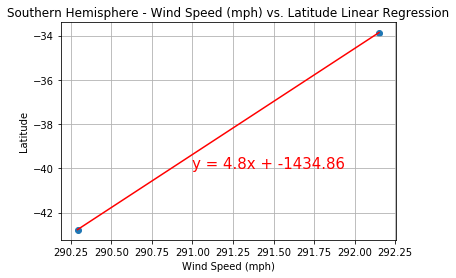

In [92]:
x_values = Southern_Hemisphere["Wind_Speed"]
y_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(291,-40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.show()